#   [Py4Hw User Guide](../UserGuide.ipynb)> 1.6 Wires
###  [Next: 1.7 Interfaces](interfaces.ipynb)

Wires are required to interconnect the logic blocks instantiated in circuits.
In py4hw wires are created by instantiating objects of the **Wire** class.

Wire require the following parameters in their constructor

1. The parent logic circuit. Every wire is created by a logic circuit. This does not has a strong implication but it is useful to track object creation.

2. A name. All objects in py4hw have a name.

3. A bit width. Wires can have a single bit, or an arbitrary number of bits. There is no limit to the number of bits.



In [1]:
import sys
import platform
if (platform.uname().node == 'TPY14'):
    print('Dev machine')
    sys.path.append('..\\..\\..\\py4hw')

Dev machine


In [2]:
import py4hw

In [3]:
sys = py4hw.HWSystem()

In [4]:
a = py4hw.Wire(sys, 'a', 2)
b = py4hw.Wire(sys, 'b', 2)

Wires are the fundamental way to transport values along circuits. A wire has a single source (circuit) and can have multiple sinks (circuits).

Thus, the Wire class implements some of the required simulation logic.


Behavioural circuits can check the actual value of a wire connected to an input port and can drive a wire connected to and output port to a certain value.

Reading the actual value from a wire **w** is done with the **w.get()** method.
Setting the value of a wire is either done with the **w.put( < value > )** or the **w.prepare(< value >)**.

Remember that this should only be done inside the implementation of a beharioual circuit, and this is not the intended way to inject signals during simulation.

But, why do we have 2 different methods **put** and **prepare** ? 

Imagine this circuit...


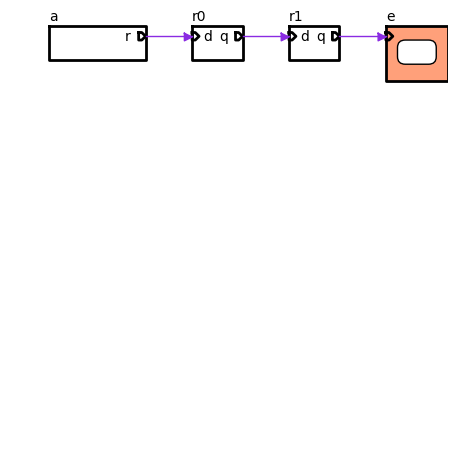

In [5]:
py4hw.Sequence(sys, 'a', [0,1,0,0], a)
c = py4hw.Wire(sys, 'c', 2)
d = py4hw.Wire(sys, 'd', 2)
e = py4hw.Wire(sys, 'e', 2)

py4hw.Reg(sys, 'r0', d=a, q=d)
py4hw.Reg(sys, 'r1', d=d, q=e)

py4hw.Scope(sys, 'e', e)
sch = py4hw.Schematic(sys)
sch.draw()

Cycle based simulators (as used by py4hw) use 2 phases to simulate circuits. 
In a first phase all the combinational signals are propagated.
Then all sequential circuits are evaluated.

Combinational circuits are sorted by data dependency as no combinational loops are allowed. Thus, combinational behavioural circuits can call **put()** on wires because values will correctly be propagated.

On the other hand, sequential circuits must consider the values of their inputs during the clock edge.
If r0 is evalued first and it uses the **put()** method, the input of the r1 circuit will see the value corresponding to the next cycle instead of the current one.

To prevent that from happening, sequential circuits MUST use the **prepare()** method. After all sequential circuits are evaluated during a clock cycle, the simulator will transfer the prepared values to the wires. 